# Analyse des données Logic Immo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [2]:
data_full = pd.read_csv("logic_immo.csv")

In [3]:
data_full.shape

(4298, 5)

In [4]:
data_full.describe()

,area,rooms,district,price
count,4298.000000,4298.000000,4298.000000,4.298000e+03
mean,89.419265,3.332480,12.664728,1.318471e+06
std,71.912545,1.843157,4.992754,1.548441e+06
min,4.000000,1.000000,1.000000,1.100000e+04
25%,42.000000,2.000000,8.000000,4.850000e+05
50%,70.000000,3.000000,14.000000,8.330000e+05
75%,114.000000,4.000000,16.000000,1.605250e+06
max,800.000000,20.000000,20.000000,2.500000e+07


In [6]:
data_full.head()

,id,area,rooms,district,price
0,8A95B48A-5CB1-C2D0-0C57-563B8A815993,20,2,18,207000
1,CF774638-0107-65A5-C3E3-45036EECD06D,80,3,16,955000
2,FAD2D406-8549-1E0D-A334-8D397409EFBC,110,4,13,1320000
3,5334429B-5936-1554-648B-D46466F79546,34,1,13,520000
4,664DDCDF-0AAE-FE1B-48F1-531F764C56F7,50,2,13,576000


In [7]:
columns = data_full.columns.values
columns

array(['id', 'area', 'rooms', 'district', 'price'], dtype=object)

In [8]:
data_full.dtypes

id          object
area         int64
rooms        int64
district     int64
price        int64
dtype: object

In [9]:
data_full['price'].describe()

count    4.298000e+03
mean     1.318471e+06
std      1.548441e+06
min      1.100000e+04
25%      4.850000e+05
50%      8.330000e+05
75%      1.605250e+06
max      2.500000e+07
Name: price, dtype: float64

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


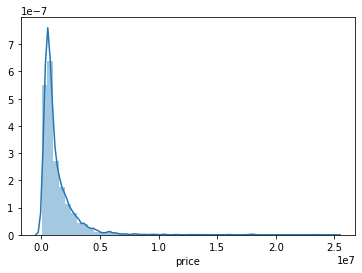

In [10]:
sns.distplot(data_full['price'])

## Division des datas en valeurs numériques ( quantitative ) et catégorielles ( qualititative ) 

In [11]:
data_full.dtypes

id          object
area         int64
rooms        int64
district     int64
price        int64
dtype: object

In [13]:
data_full['district'] = data_full['district'].astype(str)

In [14]:
cat = data_full.select_dtypes(include=['object']).columns
print(cat)

Index(['id', 'district'], dtype='object')


In [15]:
num = data_full.select_dtypes(include=['int64','float64']).columns
num = num.drop(pd.Index(['price']))
print(num)

Index(['area', 'rooms'], dtype='object')


In [16]:
print(f"{len(cat)} catégorielle(s) et {len(num)} numérique(s)")

2 catégorielle(s) et 2 numérique(s)


In [17]:
corrmat = data_full.corr()
corrmat

,area,rooms,price
area,1.000000,0.854005,0.835078
rooms,0.854005,1.000000,0.699349
price,0.835078,0.699349,1.000000


## Analyse features numériques

In [18]:
data_full.shape

(4298, 5)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


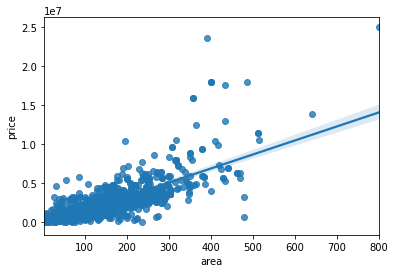

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


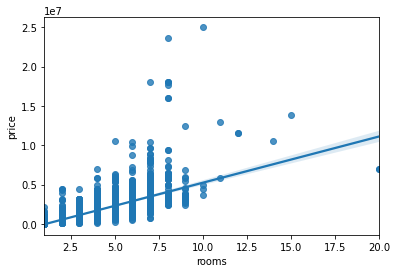

In [19]:
for feature in data_full[num]:
    sns.regplot(x=feature, y='price', data=data_full)
    plt.show()

In [20]:
shape_before_outliers = data_full.shape[0]

### Certaines features semblent avoir des outliers , Analyse une par une

* #### Surface


corr : 0.84


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


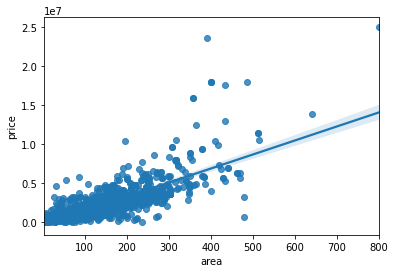

In [21]:
sns.regplot(x='area',y='price', data=data_full)
print(f"corr : {round(data_full['area'].corr(data_full['price']),2)}")

In [24]:
#data_full = data_full.drop(data_full[(data_full['area']>3400)].index).reset_index(drop=True)
#sns.regplot(x='area',y='price', data=data_full)
#print(f"corr : {round(data_full['area'].corr(data_full['price']),2)}")

In [25]:
data_full.shape

(4298, 5)

* #### Rooms

In [26]:
data_full.shape

(4298, 5)

corr : 0.7


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


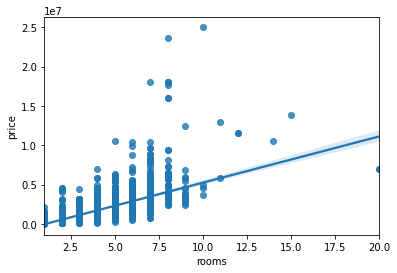

In [27]:
sns.regplot(x='rooms',y='price', data=data_full)
print(f"corr : {round(data_full['rooms'].corr(data_full['price']),2)}")

In [28]:
#nb_outliers = shape_before_outliers - data_full.shape[0]
#print(f"On a enlevé {nb_outliers} outliers")

In [29]:
data_full.shape

(4298, 5)

## Traitement des valeurs manquantes dans le dataset

In [30]:
def hasnan(dataset):
    hasNAN = round((dataset.isnull().sum() / len(dataset)) * 100,2)  # toutes les features et leurs nombres de zéros ( % )
    hasNAN = hasNAN[hasNAN > 0] # On enleve celles qui n'ont pas de valeurs nulles 
    hasNAN = hasNAN.sort_values(ascending=False)
    missing_values = pd.DataFrame({'Missing Ratio': hasNAN})
    return missing_values

In [31]:
hasnan(data_full)

,Missing Ratio


In [32]:
data_full.shape

(4298, 5)

## Analyse features catégorielles ( transformation en numériques )

### Typeof

In [62]:
data_full.typeof.value_counts()

Maison / Villa          1033
Appartement              349
Château                   56
Loft/Atelier/Surface      12
Hôtel particulier         11
Name: typeof, dtype: int64

In [63]:
data_full.typeof.isnull().sum()

0

In [64]:
# Moyenne de la surface des biens / Type
mean_area_house =  data_full.loc[data_full['typeof'] == 'Maison']['area'].mean()
mean_area_apartment =  data_full.loc[data_full['typeof'] == 'Appartement']['area'].mean()

print(f"Surface moyenne des maisons : {round(mean_sur_house,2)}")
print(f"Surface moyenne des appartements : {round(mean_area_apartment,2)}")

#### Traitement de la colonne typeof

En considérant la moyenne des surfaces de chaque type de bien on peut transformer cette colonne avec map en considerant que appartement = 1 , lofts = 2 , maison = 3 , hotel particulier = 4 , chateau = 5

In [33]:
#data_full.typeof = data_full.typeof.map({'Appartement':1, 'Loft/Atelier/Surface':2, 'Maison / Villa':3, 'Hôtel particulier':4 , 'Château': 5})

In [34]:
data_full.head(1)

,id,area,rooms,district,price
0,8A95B48A-5CB1-C2D0-0C57-563B8A815993,20,2,18,207000


In [35]:
data_full.dtypes

id          object
area         int64
rooms        int64
district    object
price        int64
dtype: object

### Dummies colonne district

In [38]:
data_full = pd.get_dummies(data_full, columns=['district'], drop_first=True)

In [39]:
data_full.head(1)

,id,area,rooms,price,district_10,district_11,district_12,district_13,district_14,district_15,...,district_19,district_2,district_20,district_3,district_4,district_5,district_6,district_7,district_8,district_9
0,8A95B48A-5CB1-C2D0-0C57-563B8A815993,20,2,207000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
data_full.shape

(4298, 23)

135 nouvelles features !

## enregistrement en csv

In [41]:
data_full.to_csv('logic_immo_trainfull.csv')